In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [37]:
train = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
test = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")

In [38]:
train.shape

(14731, 22)

<AxesSubplot:>

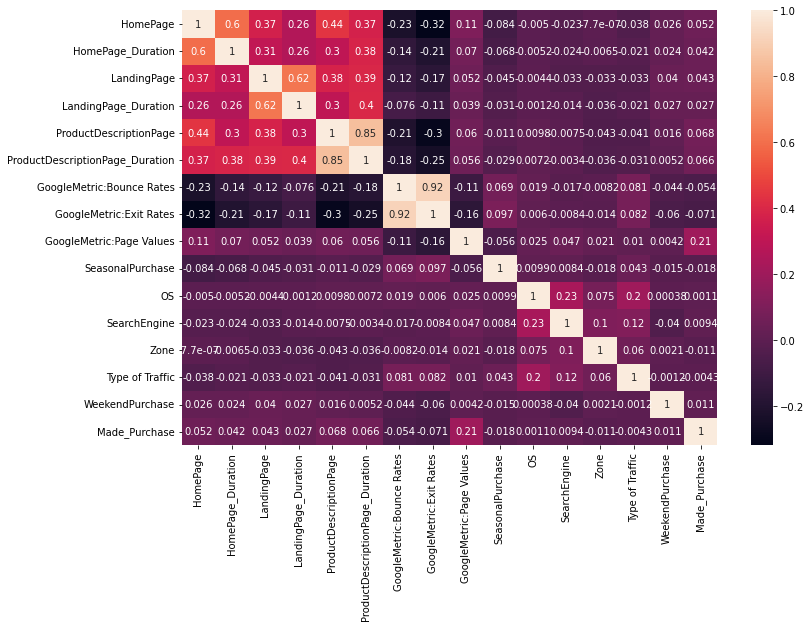

In [39]:
train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [40]:
train["Made_Purchase"].value_counts()   

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [42]:
convert_to_obj = ["OS", "SearchEngine", "Zone", "Type of Traffic", "SeasonalPurchase"]
convert_to_bool = ["WeekendPurchase"]

for i in convert_to_obj:
    train[i] = train[i].astype("object")
    test[i] = test[i].astype("object")

for i in convert_to_bool:
    train[i] = train[i].astype("object")
    test[i] = test[i].astype("object")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  object 
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  object 
 12  SearchEngine      

In [43]:
NUM_FEATURES = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase"]
CAT_FEATURES = ["Month_SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "CustomerType", "Gender", "Cookies Setting", "Education", "Marital Status"]
BOOL_FEATURES = ["WeekendPurchase", "Made_Purchase"]

class CategoricalDataManipulator(BaseEstimator, TransformerMixin) : 
     def __init__(self, columns) :   
          self.columns = columns 
          return None

     def fit(self, train, y=None) :
          return self
        
def transform(self, train, y=None) :
          train = pd.trainFrame(train, columns=self.columns)
          train.loc[train["OS"] >= 4.0, ["OS"]] = 4
          train.loc[train["SearchEngine"] >= 3, ["SearchEngine"]] = 3
          train.loc[train["Zone"] == 2, ["Zone"]] = 2
          train.loc[train["Zone"] >= 4, ["Zone"]] = 4
          train.loc[train["Type of Traffic"] >= 4, ["Type of Traffic"]] = 4
          train.loc[train["CustomerType"] == "Other", ["CustomerType"]] = "New_Visitor"
          train.replace({0:0.0001}, inplace=True)
          return train

In [ ]:
y_train = train['Made_Purchase']
x_train = train.drop(columns = 'Made_Purchase')

In [ ]:
# calculate upper and lower bounds for outlier detection
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify and mark the outliers as NaN
x_train[(x_train < lower_bound) | (x_train > upper_bound)] = np.nan
process(x_train)

In [ ]:
# calculate upper and lower bounds for outlier detection
Q1 = x_test.quantile(0.25)
Q3 = x_test.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify and mark the outliers as NaN
x_test[(x_test < lower_bound) | (x_test > upper_bound)] = np.nan
process(x_test)

In [7]:
train = train.drop(columns = ['GoogleMetric:Bounce Rates' ,'GoogleMetric:Exit Rates','SeasonalPurchase','Type of Traffic','Zone','SearchEngine','OS'])
test = test.drop(columns = ['GoogleMetric:Bounce Rates' ,'GoogleMetric:Exit Rates','SeasonalPurchase','Type of Traffic','Zone','SearchEngine','OS'])

In [21]:
x_train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Page Values           132
Month_SeasonalPurchase             144
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

**Logistic Regression**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=64, solver='newton-cg')
# clf.fit(X_train, y_train)
# print("Training Score : ", clf.score(X_train,y_train))

# # get matrix
# get_metrics(clf, X_valid,y_valid)

**K Nearest Neighbours**

In [ ]:
# clf = KNeighborsClassifier(n_neighbors=5)

# # train the model on the training data
# clf.fit(X_train, y_train)

# # make predictions on the test data
# print("Training Score : ", clf.score(X_train,y_train))

# # get matrix
# get_metrics(clf, X_valid,y_valid)

**Support Vector Machine**

In [ ]:
# from sklearn.svm import SVC
# x_test=test
# clf = SVC(kernel='rbf')
# train the model on the training data
# clf.fit(X_train, y_train)
# # make predictions on the test data
# print("Training Score : ", clf.score(X_train,y_train))

# # get matrix
# get_metrics(clf, X_valid,y_valid)

**Decision Trees**

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# x_test=test
# clf = DecisionTreeClassifier()

# # train the model on the training data
# clf.fit(X_train, y_train)

# # make predictions on the test data
# print("Training Score : ", clf.score(X_train,y_train))

# # get matrix
# get_metrics(clf, X_valid,y_valid)

**Gradient Boosting**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=100)

# # train the model on the training data
# clf.fit(X_train, y_train)
# print("Training Score : ", model.score(X_train,y_train))

# # get matrix
# get_metrics(model, X_valid,y_valid)

In [13]:
# Selecting Parameters for hyperparameter Tuning of XgBoost

parameters = {   
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'n_estimators': [100, 200,300,400,500,600,900,1000,2000,4000,5000],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'min_child_weight': [1,3,5,7,8],
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'reg_alpha':[0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda':[0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'scale_pos_weight':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'max_delta_step':[0,1,2,3,4,5,6,7,8,9,10],
    'base_score': [0.5,0.7,0.9]   
}

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# from sklearn.model_selection import GridSearchCV
xgb_tunned =XGBClassifier()
# bagging = BaggingClassifier(xgb_tunned)


random_search = RandomizedSearchCV(xgb_tunned, params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose = 3)

random_search.fit(X_train, y_train)
print("Training Score: ", random_search.score(X_train, y_train))
get_metrics(random_search, X_train, y_train)

print(random_search.best_params_)

In [18]:
pred = pipe.predict(test)
pred = pred.astype(bool)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  "X does not have valid feature names, but"


In [19]:
submission = pd.DataFrame(columns = ['id','Made_Purchase'])
submission['id'] = [i for i in range(len(pred))]
submission['Made_Purchase'] = pred
submission.to_csv('submission.csv',index = False)

In [20]:
submission 

,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
6594,6594,False
6595,6595,False
6596,6596,False
6597,6597,False
